In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/nekowawolf/NASA-promise-dataset/raw/refs/heads/main/cm1.csv')

In [ ]:
# Cek data awal
print("Ukuran dataset:", df.shape)
df.head()

Ukuran dataset: (498, 22)


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [ ]:
# Cek missing value
print("\nCek Missing Value:")
print(df.isnull().sum())


Cek Missing Value:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


In [ ]:
# Hapus baris yang ada missing value
df = df.dropna()
print("\nUkuran dataset setelah hapus missing value:", df.shape)


Ukuran dataset setelah hapus missing value: (498, 22)


In [ ]:
# Encode label 'defects' menjadi 0 dan 1
df['defects'] = df['defects'].astype(int)

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns='defects')
y = df['defects']

In [ ]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Gabungkan fitur yang sudah dinormalisasi dengan label 'defects'
df_final = X_scaled.copy()
df_final['defects'] = y.values

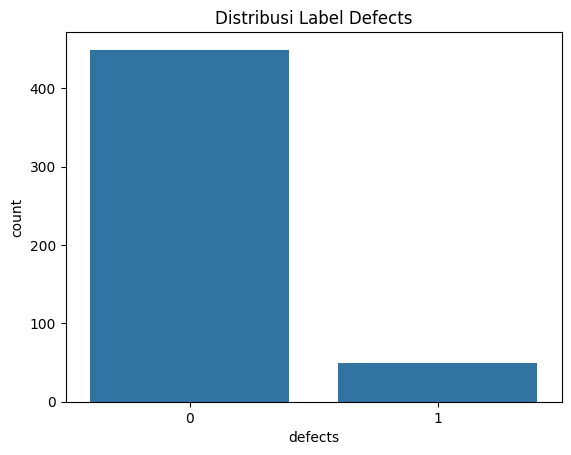

In [ ]:
# Cek distribusi label
sns.countplot(x='defects', data=df_final)
plt.title('Distribusi Label Defects')
plt.show()

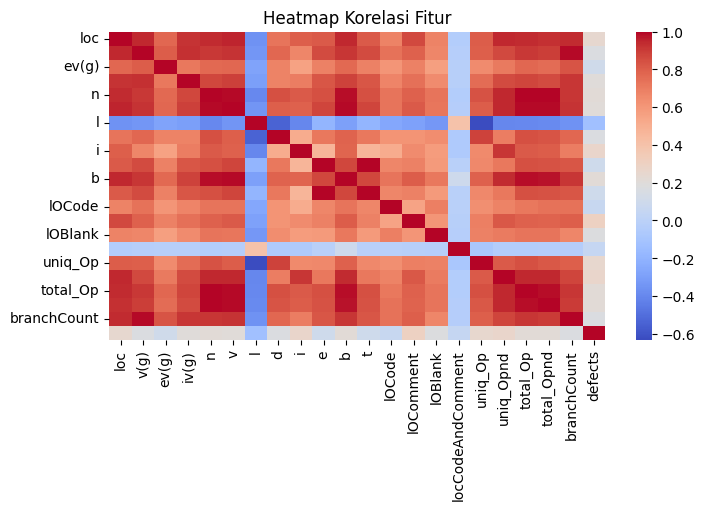

In [ ]:
# Korelasi antar fitur (Heatmap)
plt.figure(figsize=(8, 4))
sns.heatmap(df_final.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [ ]:
# Simpan dataset final
df_final.to_csv('cm1_final.csv', index=False)
print("\nDataset final disimpan sebagai 'cm1_final.csv'")


Dataset final disimpan sebagai 'cm1_final.csv'


In [ ]:
# Cuplikan data final
df_final.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.00590,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.00295,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000,1
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.00000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689,0
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267,0
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,0


# Modeling Awal & Evaluasi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
# Split data
X = df_final.drop(columns='defects')
y = df_final['defects']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Prediksi & Evaluasi
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Akurasi: {acc:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       134
           1       0.08      0.06      0.07        16

    accuracy                           0.83       150
   macro avg       0.49      0.49      0.49       150
weighted avg       0.81      0.83      0.82       150



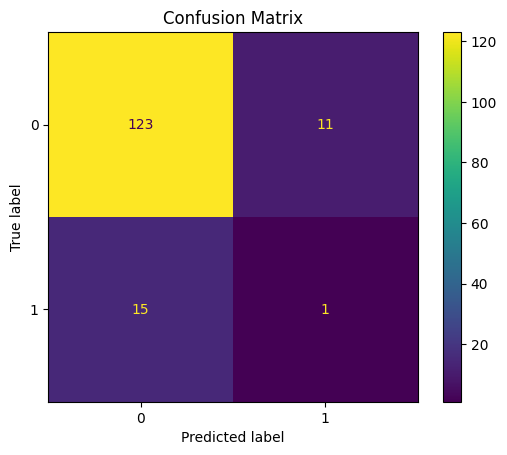

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Lampiran 1: Statistik deskriptif (mean, median, std, min, max, jumlah NaN)

In [ ]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193,0.098394
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219,0.298146
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000,0.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000,0.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000,0.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000,1.000000


# Lampiran 2: Visualisasi distribusi data (histogram, boxplot, heatmap korelasi, dll)

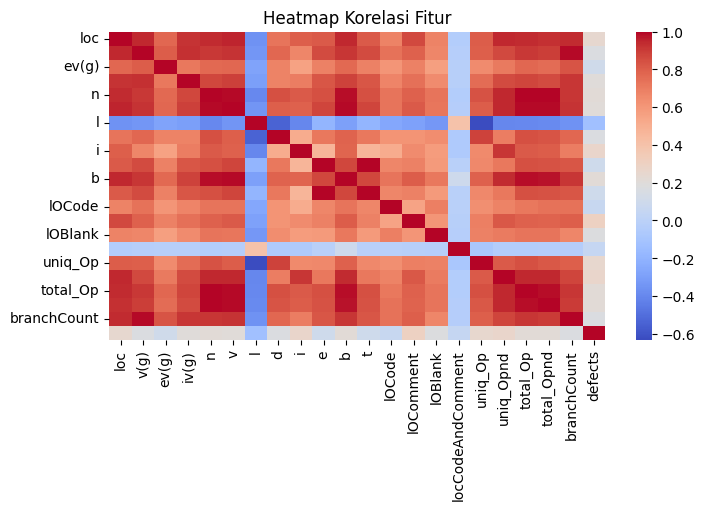

In [ ]:
# Korelasi antar fitur (Heatmap)
plt.figure(figsize=(8, 4))
sns.heatmap(df_final.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

 # Lampiran 3: Tabel hasil encoding kategorik dan normalisasi numerik


In [ ]:
print("Hasil Encode Target 'defects' (True/False jadi 1/0):")
print(df['defects'].value_counts())

print("\nContoh Data Setelah Normalisasi (MinMaxScaler):")
X_scaled.head()

Hasil Encode Target 'defects' (True/False jadi 1/0):
defects
0    449
1     49
Name: count, dtype: int64

Contoh Data Setelah Normalisasi (MinMaxScaler):


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.000011,0.0250,0.00590,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.000008,0.0125,0.00295,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.001364,0.0125,0.00000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.001601,0.0000,0.00000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.002786,0.0000,0.00000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112


# Lampiran 4: Tabel perbandingan data sebelum dan sesudah preprocessing


In [ ]:
print("Data Sebelum Preprocessing:")
df.head()

print("\nData Setelah Preprocessing (Normalisasi + Encode):")
df_final.head()

Data Sebelum Preprocessing:

Data Setelah Preprocessing (Normalisasi + Encode):


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.00590,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.00295,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000,1
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.00000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689,0
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267,0
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,0


# Lampiran 5: Potongan kode preprocessing (Python/Notebook)

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('https://github.com/nekowawolf/NASA-promise-dataset/raw/refs/heads/main/cm1.csv')
df = df.dropna()

# Encode target
df['defects'] = df['defects'].astype(int)

# Pisahkan fitur & target
X = df.drop(columns='defects')
y = df['defects']

# Normalisasi
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Gabungkan
df_final = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Lampiran 6: Dataset final (cuplikan 10 baris pertama + format CSV/XLSX)

In [ ]:
print("10 Baris Pertama Dataset Final (Format CSV):")
df_final.head(10)

10 Baris Pertama Dataset Final (Format CSV):


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.005900,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.002950,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000,1
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.000000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689,0
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.000000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267,0
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,0
5,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,0
6,0.014218,0.000000,0.000000,0.000000,0.004822,0.002036,0.384615,0.015902,0.059350,3.238162e-05,...,0.0000,0.000000,0.006098,0.0,0.042254,0.015924,0.003968,0.006143,0.000000,0
7,0.026066,0.010526,0.000000,0.016129,0.010608,0.005490,0.123077,0.051125,0.049782,2.806160e-04,...,0.0000,0.000000,0.042683,0.0,0.126761,0.022293,0.010317,0.011057,0.012422,0
8,0.056872,0.042105,0.137931,0.064516,0.051109,0.032050,0.053846,0.113302,0.131129,3.631380e-03,...,0.1500,0.047198,0.079268,0.0,0.197183,0.063694,0.053968,0.046683,0.049689,0
9,0.106635,0.147368,0.068966,0.000000,0.114754,0.079560,0.030769,0.177308,0.208050,1.410507e-02,...,0.1000,0.103245,0.134146,0.0,0.197183,0.117834,0.101587,0.135135,0.173913,0


# Lampiran 7: Evaluasi Awal + Confusion Matrix

Akurasi Awal: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       134
           1       0.08      0.06      0.07        16

    accuracy                           0.83       150
   macro avg       0.49      0.49      0.49       150
weighted avg       0.81      0.83      0.82       150



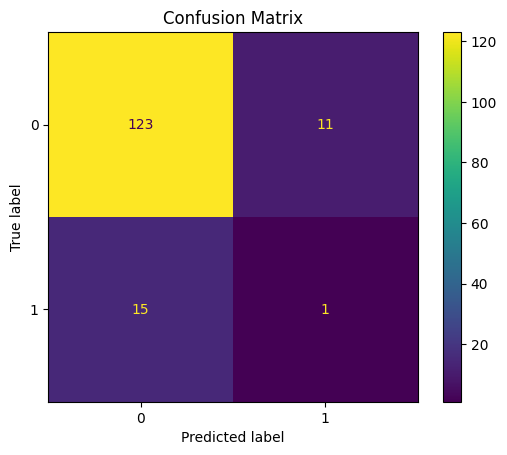

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data
X = df_final.drop(columns='defects')
y = df_final['defects']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
acc = accuracy_score(y_test, y_pred)
print(f'Akurasi Awal: {acc:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# Lampiran 8: Link Github Dataset

Github: https://github.com/nekowawolf/NASA-promise-dataset

# Revisi: lakukan proses imbalance data, analisis korelasi, bandingkan minimal 3 algoritma, cari yang lebih akurat

In [14]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dan praproses data awal
df = pd.read_csv('https://github.com/nekowawolf/NASA-promise-dataset/raw/refs/heads/main/cm1.csv')
print("Ukuran dataset:", df.shape)
print("\nCek Missing Value:")
print(df.isnull().sum())
df = df.dropna()
print("\nUkuran dataset setelah hapus missing value:", df.shape)

Ukuran dataset: (498, 22)

Cek Missing Value:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Ukuran dataset setelah hapus missing value: (498, 22)


In [3]:
# Encode label dan pisahkan fitur-target
df['defects'] = df['defects'].astype(int)
X = df.drop(columns='defects')
y = df['defects']

In [4]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [5]:
# Tangani imbalance data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

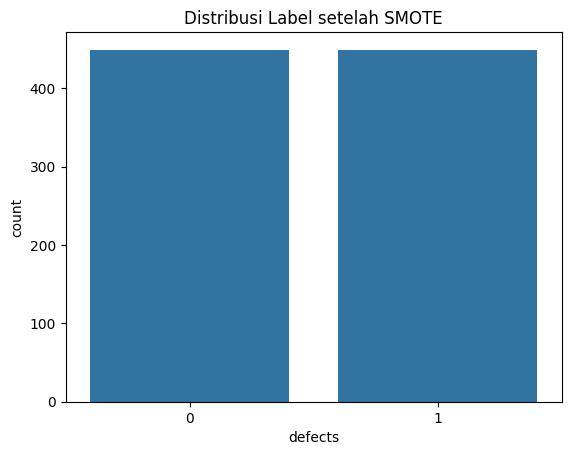

In [6]:
# Visualisasi distribusi label setelah SMOTE
sns.countplot(x=y_resampled)
plt.title('Distribusi Label setelah SMOTE')
plt.show()

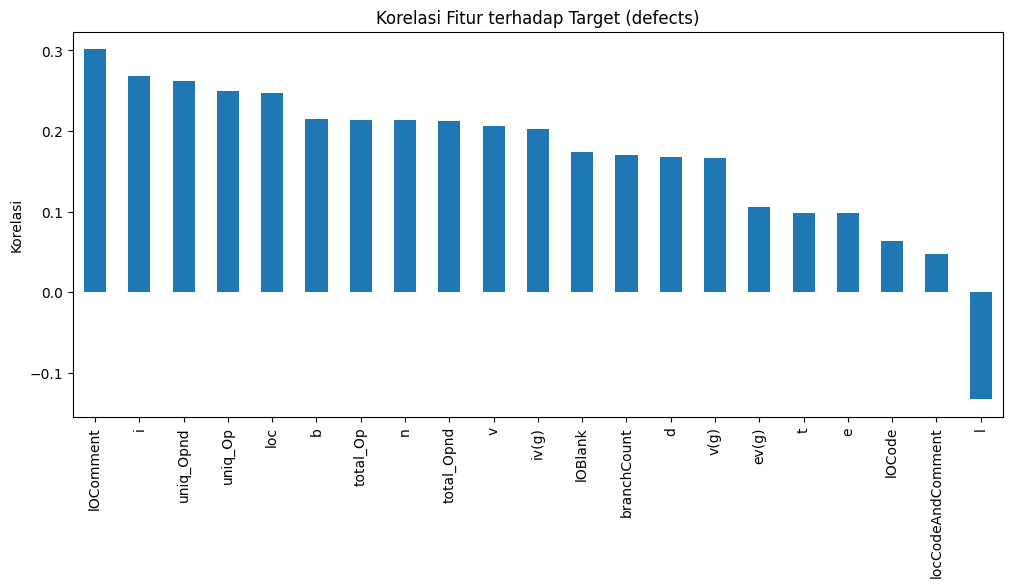

In [7]:
# Analisis korelasi terhadap target
df_final = X_scaled.copy()
df_final['defects'] = y.values
correlations = df_final.corr()['defects'].drop('defects')
correlations.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title('Korelasi Fitur terhadap Target (defects)')
plt.ylabel('Korelasi')
plt.show()

In [8]:
# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [9]:
# Bandingkan 3 algoritma
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Akurasi:", acc)
    print(classification_report(y_test, y_pred, zero_division=0))


Model: Logistic Regression
Akurasi: 0.7611111111111111
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        96
           1       0.73      0.79      0.75        84

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180


Model: Random Forest
Akurasi: 0.9277777777777778
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        96
           1       0.89      0.96      0.93        84

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180


Model: K-Nearest Neighbors
Akurasi: 0.7888888888888889
              precision    recall  f1-score   support

           0       0.97      0.62      0.76        96
           1       0.69      0.98      0.81        84

    accuracy        

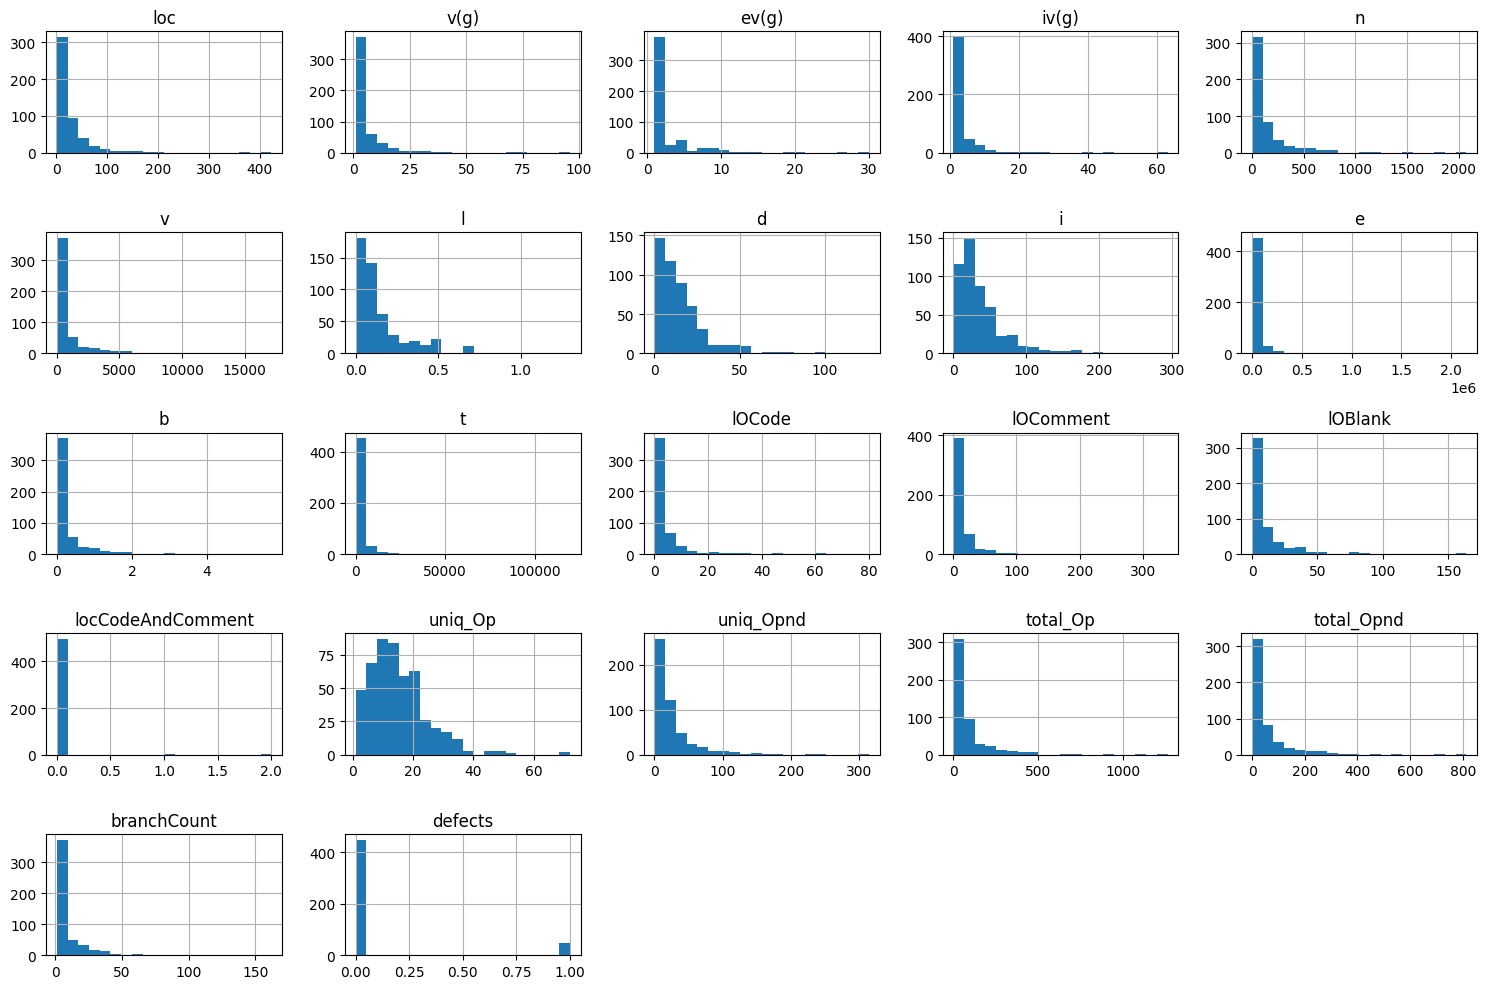

In [10]:
# Histogram semua fitur numerik
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

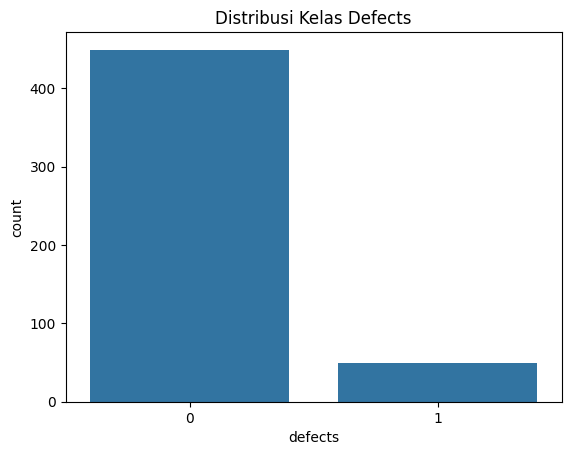

In [11]:
# Countplot untuk label 'defects'
sns.countplot(data=df, x='defects')
plt.title("Distribusi Kelas Defects")
plt.show()

In [12]:
# Contoh encoding label (jika belum numerik)
if df['defects'].dtype == 'object':
    le = LabelEncoder()
    df['defects'] = le.fit_transform(df['defects'])

# Normalisasi seluruh fitur numerik kecuali target
X = df.drop('defects', axis=1)
y = df['defects']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Gabungkan kembali ke DataFrame untuk ditampilkan
df_encoded_normalized = pd.DataFrame(X_scaled, columns=X.columns)
df_encoded_normalized['defects'] = y.values

df_encoded_normalized.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.00590,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.00295,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000,1
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.00000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689,0
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267,0
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,0


In [15]:
# Drop kolom non-penting atau berisi banyak missing value
df = df.dropna()  # atau df.drop(columns=['kolom_x'])

# Encoding label
le = LabelEncoder()
df['defects'] = le.fit_transform(df['defects'])

# Normalisasi fitur numerik
X = df.drop('defects', axis=1)
y = df['defects']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Pisah data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE (jika digunakan)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
